<a href="https://colab.research.google.com/github/OfekYa/DataMining/blob/main/TechnicalQuestions_BayesNet_and_AssociationRules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian network and Association rules

# **Bayesian network**
Technical implementation of finding probabilities in a Bayesian network


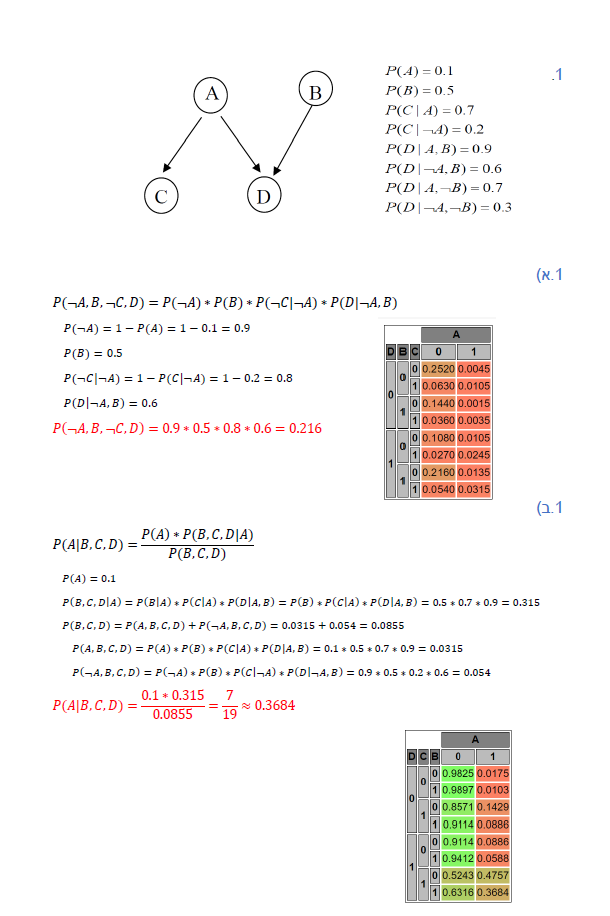

In [1]:
!pip install pyAgrum


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 8.8 MB/s eta 0:00:00


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [3]:
bn=gum.fastBN("C<-A->D<-B") 
bn

(pyAgrum.BayesNet<double>@0x25e3d70) BN{nodes: 4, arcs: 3, domainSize: 16, dim: 8, mem: 128o}

In [4]:
bn.cpt('A').fillWith([0.9,0.1]) 


(pyAgrum.Potential<double>@0x219fd00) 
  A                |
0        |1        |
---------|---------|
 0.9000  | 0.1000  |

In [5]:
bn.cpt('B').fillWith([0.5,0.5]) 


(pyAgrum.Potential<double>@0x21c4bc0) 
  B                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [6]:
bn.cpt("C").names


('C', 'A')

In [7]:
bn.cpt("C")[:]=[ [0.8,0.2],[0.3,0.7]]
print(bn.cpt("C")[1])


[0.3 0.7]


In [8]:
bn.cpt('C')

(pyAgrum.Potential<double>@0x25b1b90) 
      ||  C                |
A     ||0        |1        |
------||---------|---------|
0     || 0.8000  | 0.2000  |
1     || 0.3000  | 0.7000  |

In [9]:
print(bn.cpt("D").names)
bn.cpt("D")

('D', 'A', 'B')


(pyAgrum.Potential<double>@0x23aa660) 
             ||  D                |
A     |B     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.4589  | 0.5411  |
1     |0     || 0.4874  | 0.5126  |
0     |1     || 0.5446  | 0.4554  |
1     |1     || 0.7039  | 0.2961  |

In [10]:
bn.cpt("D")[{'A': 0, 'B': 0}] = [0.7, 0.3]
bn.cpt("D")[{'A': 0, 'B': 1}] = [0.4, 0.6]
bn.cpt("D")[{'A': 1, 'B': 0}] = [0.3, 0.7]
bn.cpt("D")[{'A': 1, 'B': 1}] = [0.1, 0.9]
bn.cpt("D")

(pyAgrum.Potential<double>@0x23aa660) 
             ||  D                |
A     |B     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.7000  | 0.3000  |
1     |0     || 0.3000  | 0.7000  |
0     |1     || 0.4000  | 0.6000  |
1     |1     || 0.1000  | 0.9000  |

# P(A | B, C, D) = 0.3684

In [11]:
ie=gum.LazyPropagation(bn)
ie.evidenceImpact("A",["B","C","D"])

(pyAgrum.Potential<double>@0x1c068b0) 
                    ||  A                |
B     |C     |D     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.9825  | 0.0175  |
1     |0     |0     || 0.9897  | 0.0103  |
0     |1     |0     || 0.8571  | 0.1429  |
1     |1     |0     || 0.9114  | 0.0886  |
0     |0     |1     || 0.9114  | 0.0886  |
1     |0     |1     || 0.9412  | 0.0588  |
0     |1     |1     || 0.5243  | 0.4757  |
1     |1     |1     || 0.6316  | 0.3684  |

In [12]:
gum.getPosterior(bn,evs={'B':1, 'C':1, 'D':1},target='A')


(pyAgrum.Potential<double>@0x1a0b4f0) 
  A                |
0        |1        |
---------|---------|
 0.6316  | 0.3684  |

# P(!A, B, !C, D) = 0.2160

In [13]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"A","B","C","D"})
ie.makeInference()
ie.jointPosterior({"A","B","C","D"})

(pyAgrum.Potential<double>@0x1a13c50) 
                    ||  A                |
C     |B     |D     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.2520  | 0.0045  |
1     |0     |0     || 0.0630  | 0.0105  |
0     |1     |0     || 0.1440  | 0.0015  |
1     |1     |0     || 0.0360  | 0.0035  |
0     |0     |1     || 0.1080  | 0.0105  |
1     |0     |1     || 0.0270  | 0.0245  |
0     |1     |1     || 0.2160  | 0.0135  |
1     |1     |1     || 0.0540  | 0.0315  |

In [ ]:
gnb.showInference(bn, evs={}, targets={'A', 'B', 'C', 'D'})


In [ ]:
gnb.showPosterior(bn,evs={'B':1, 'C':1, 'D':1}, target="A")


In [ ]:
gnb.sideBySide(bn,gnb.getInference(bn))


# **#################################################################**
# **#################################################################**

# **Association rules**

Finding frequency groups using the FP-growth algorithm and building an FP tree

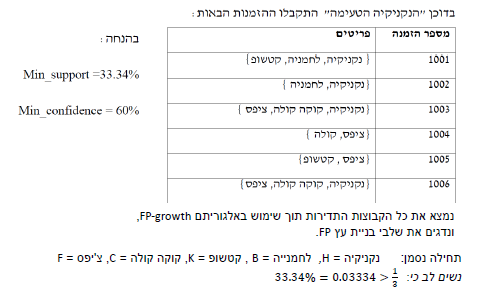

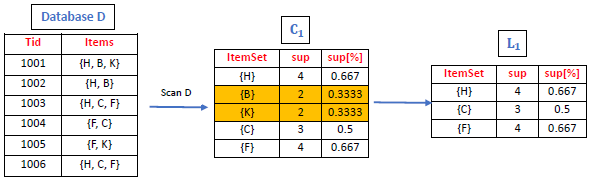

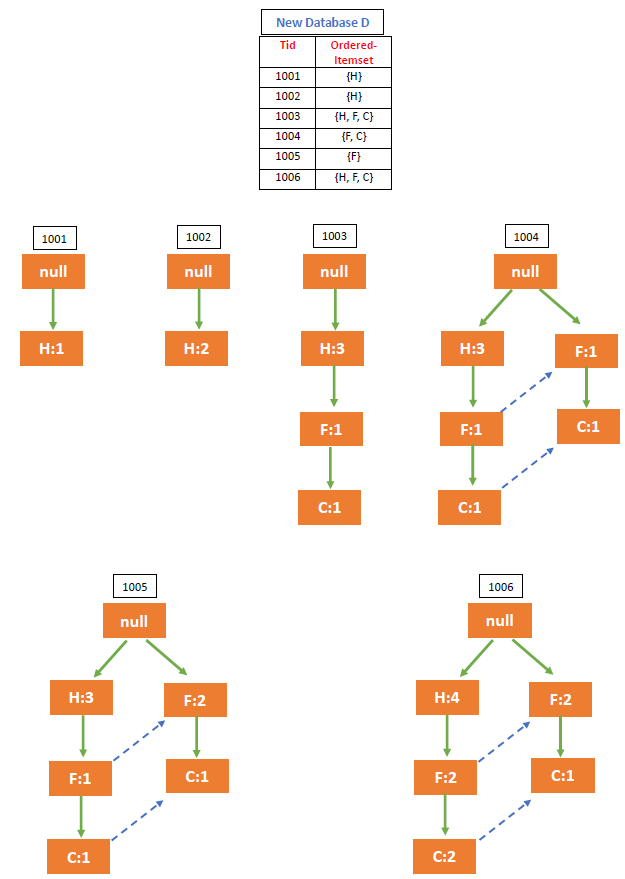

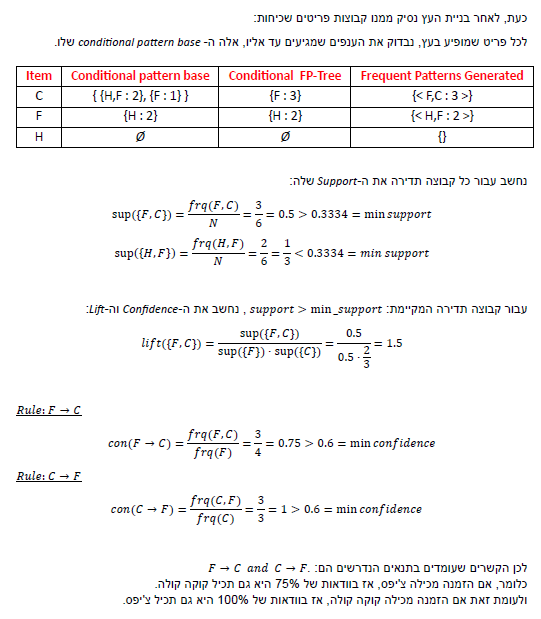

In [18]:
dataset = [['H', 'B', 'K'],
           ['H', 'B'],
           ['H', 'C', 'F'],
           ['F', 'C'],
           ['F', 'K'],
           ['H', 'C', 'F']]

In [19]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,B,C,F,H,K
0,True,False,False,True,True
1,True,False,False,True,False
2,False,True,True,True,False
3,False,True,True,False,False
4,False,False,True,False,True
5,False,True,True,True,False


In [20]:
from mlxtend.frequent_patterns import apriori


In [21]:
frequent_itemset = apriori(df, min_support=0.34,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.500000,(C)
1,0.666667,(F)
2,0.666667,(H)
3,0.500000,"(F, C)"


In [22]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemset, metric='confidence', min_threshold=0.6)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(F),(C),0.666667,0.500000,0.5,0.75,1.5,0.166667,2.0
1,(C),(F),0.500000,0.666667,0.5,1.00,1.5,0.166667,inf


In [ ]:
!pip install pyfpgrowth


In [25]:
#!pip install pyfpgrowth

# Sample code to do FP-Growth in Python
import pyfpgrowth
# Creating Sample Transactions
transactions = dataset
FrequentPatterns = pyfpgrowth. find_frequent_patterns(transactions, 3)
rules = pyfpgrowth. generate_association_rules(FrequentPatterns,0.6)
print('FrequentPatterns: ', FrequentPatterns)

print('Rules: ', rules)


FrequentPatterns:  {('C',): 3, ('C', 'F'): 3, ('H',): 4, ('F',): 4}
Rules:  {('C',): (('F',), 1.0), ('F',): (('C',), 0.75)}
